<font color = #ff6666> <h1>Walmart Project</h1></font>
<font color = "#ff6600"><h1>Problem Statement</h1></font>
<font color = "#336600"><h4>A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply</h4></font>.
<font color = '#53ff1a'> <h4>Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.</h4></font>

<font color = "#ff6600"><h2>Importing the Libraries</h2></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [2]:
data = pd.read_csv('Walmart.csv')
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

<font color = "orange"><h2>1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:</h2></font>

In [3]:
#checking for null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

This shows that there are 0 null values

In [4]:
data.duplicated().sum()

0

In [5]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data['Date']= pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [8]:
data = data.set_index('Date')
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106

In [9]:
data['Store']=data['Store'].astype('category')

In [10]:
data['Holiday_Flag'] = data['Holiday_Flag'].astype('category')

In [11]:
data['Year'] = data.index.year

In [12]:
data['Month'] = data.index.month

In [13]:
data['Week'] = data.index.isocalendar().week

In [14]:
data.head()

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-02-05     1    1643690.90            0        42.31       2.572   
2010-02-12     1    1641957.44            1        38.51       2.548   
2010-02-19     1    1611968.17            0        39.93       2.514   
2010-02-26     1    1409727.59            0        46.63       2.561   
2010-03-05     1    1554806.68            0        46.50       2.625   

                   CPI  Unemployment  Year  Month  Week  
Date                                                     
2010-02-05  211.096358         8.106  2010      2     5  
2010-02-12  211.242170         8.106  2010      2     6  
2010-02-19  211.289143         8.106  2010      2     7  
2010-02-26  211.319643         8.106  2010      2     8  
2010-03-05  211.350143         8.106  2010      3     9

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Weekly_Sales  6435 non-null   float64 
 2   Holiday_Flag  6435 non-null   category
 3   Temperature   6435 non-null   float64 
 4   Fuel_Price    6435 non-null   float64 
 5   CPI           6435 non-null   float64 
 6   Unemployment  6435 non-null   float64 
 7   Year          6435 non-null   int32   
 8   Month         6435 non-null   int32   
 9   Week          6435 non-null   UInt32  
dtypes: UInt32(1), category(2), float64(5), int32(2)
memory usage: 397.4 KB


In [16]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data.describe()

Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment  \
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000   
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151   
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885   
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000   
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000   
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000   
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000   
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000   

              Year        Month       Week  
count  6435.000000  6435.000000     6435.0  
mean   2010.965035     6.447552  25.818182  
std       0.797019     3.238308  14.129201  
min    2010.000000     1.000000        1.0  
25%    2010.000000     4.000000       14.0  
50%    2011.000000     6.000000       26.0  
75%    2012.000000     9.000000       38.0  
max    2012.000000    12.000000       52.0

In [19]:
data.shape

(6435, 10)

<font color = "#ff6600"><h2>Checking for outliers</h2></font>

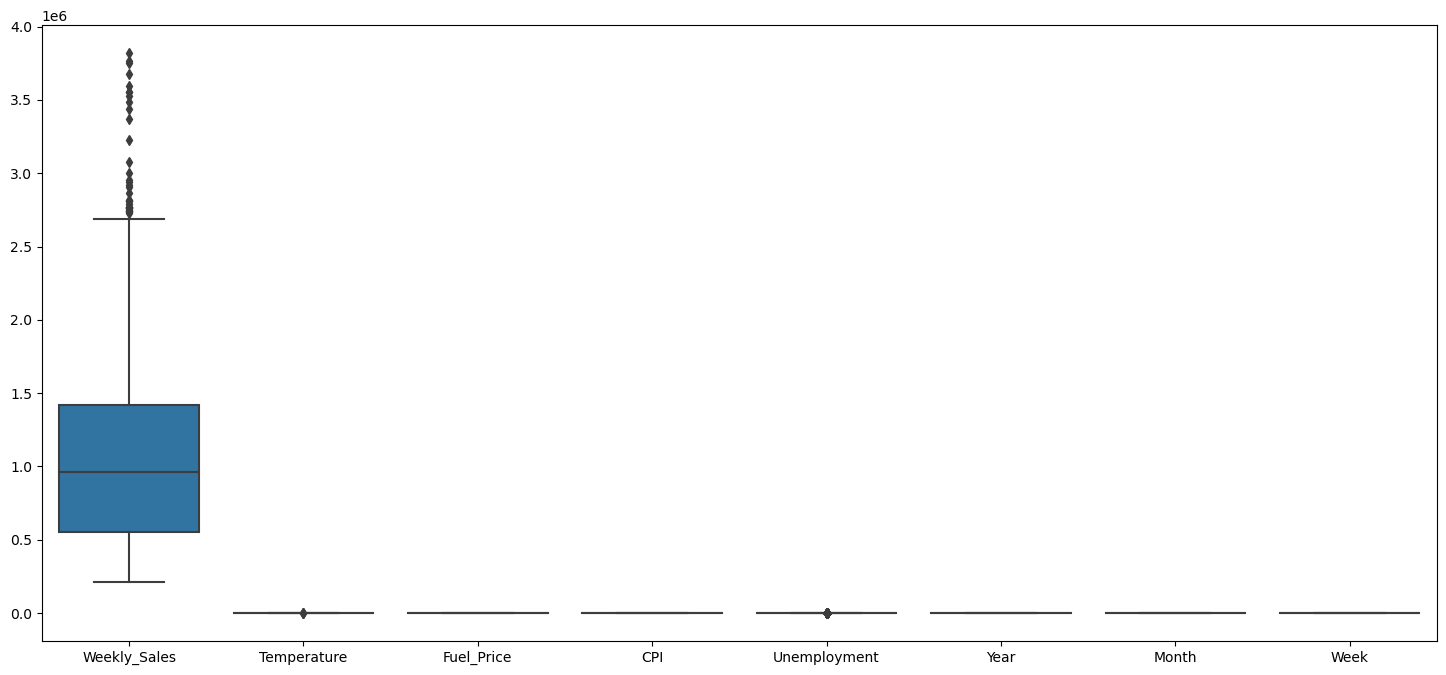

In [20]:
plt.figure(figsize=(18,8))
colours = sns.color_palette(n_colors=8)
sns.boxplot(data = data,palette=colours)
plt.show()

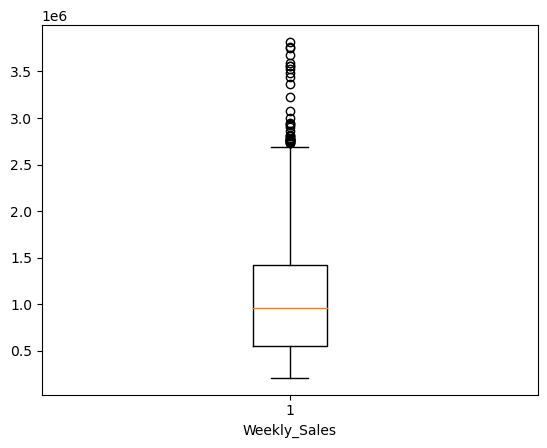

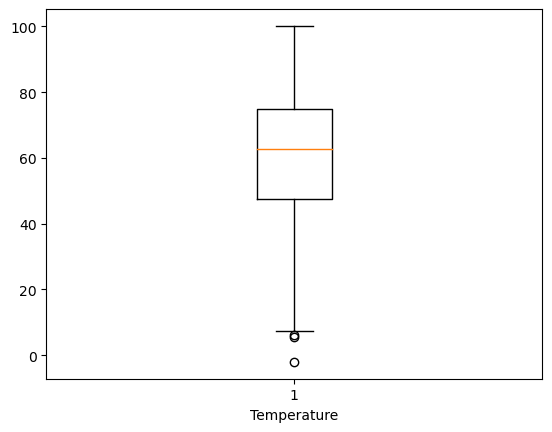

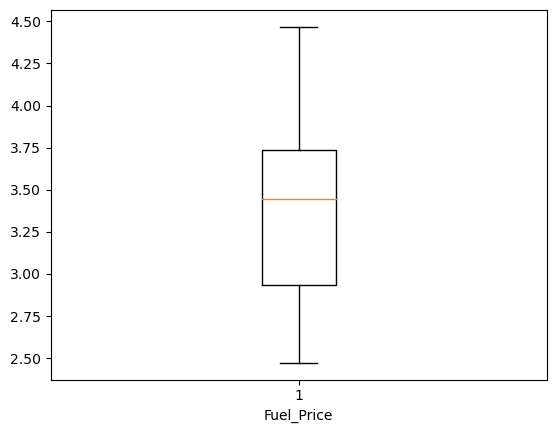

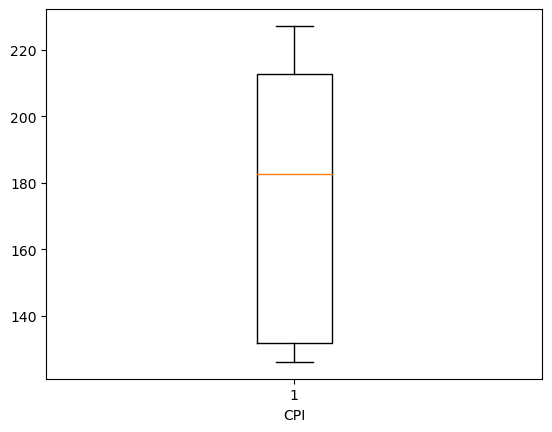

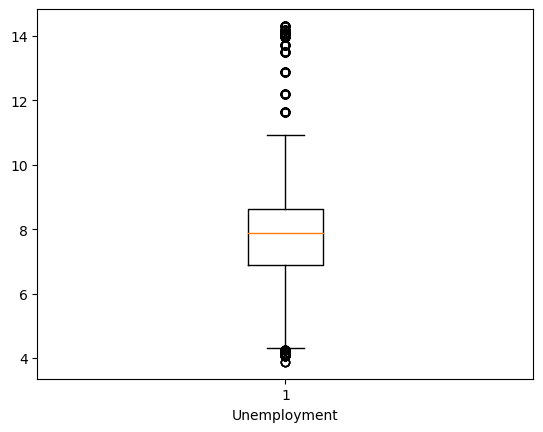

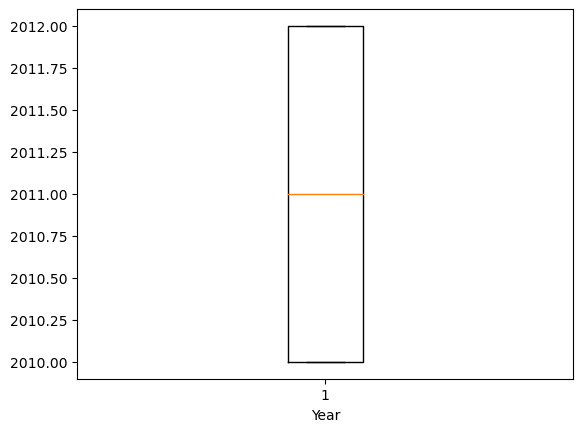

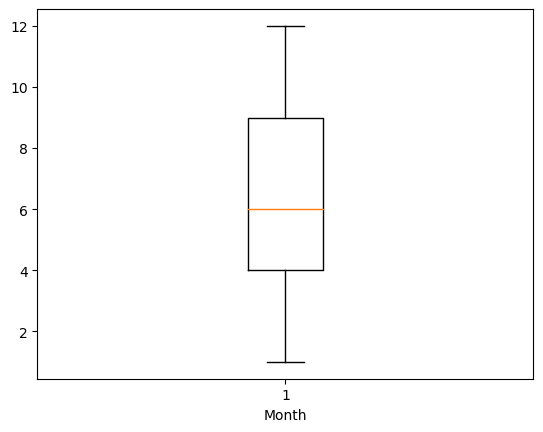

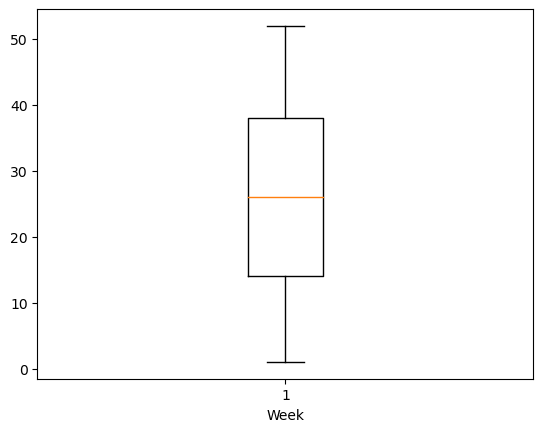

In [21]:
for i in data.columns:
    if ((data[i].dtype!='object') & (data[i].dtype!='category')):
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [22]:
col = ['Weekly_Sales','Unemployment','Temperature']

In [23]:
for column in col:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]


In [24]:
data.shape

(5919, 10)

In [25]:
data.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store         1.000000     -0.319365      0.004298    -0.026907    0.047579   
Weekly_Sales -0.319365      1.000000      0.024404    -0.041461    0.019663   
Holiday_Flag  0.004298      0.024404      1.000000    -0.156712   -0.076466   
Temperature  -0.026907     -0.041461     -0.156712     1.000000    0.145525   
Fuel_Price    0.047579      0.019663     -0.076466     0.145525    1.000000   
CPI          -0.208538     -0.082900     -0.000344     0.218625   -0.144229   
Unemployment  0.309683     -0.073107      0.011055     0.024435   -0.105091   
Year         -0.007423     -0.021173     -0.053865     0.083215    0.782880   
Month         0.013616      0.043011      0.119893     0.245695   -0.029197   
Week          0.013825      0.039792      0.124406     0.246552   -0.019073   

                   CPI  Unemployment      Year     Month      Week  
Store        -0.208538      0.309683 -0.007423  0.013616  0.013825  
Weekly_Sales -0.082900     -0.073107 -0.021173  0.043011  0.039792  
Holiday_Flag -0.000344      0.011055 -0.053865  0.119893  0.124406  
Temperature   0.218625      0.024435  0.083215  0.245695  0.246552  
Fuel_Price   -0.144229     -0.105091  0.782880 -0.029197 -0.019073  
CPI           1.000000     -0.218846  0.086891  0.001001  0.002376  
Unemployment -0.218846      1.000000 -0.242430 -0.009228 -0.011915  
Year          0.086891     -0.242430  1.000000 -0.182093 -0.169308  
Month         0.001001     -0.009228 -0.182093  1.000000  0.995931  
Week          0.002376     -0.011915 -0.169308  0.995931  1.000000

<font color = "orange"><h2>If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?</h2></font>

Text(0.5, 1.0, 'Weekly sales affecting unemployment')

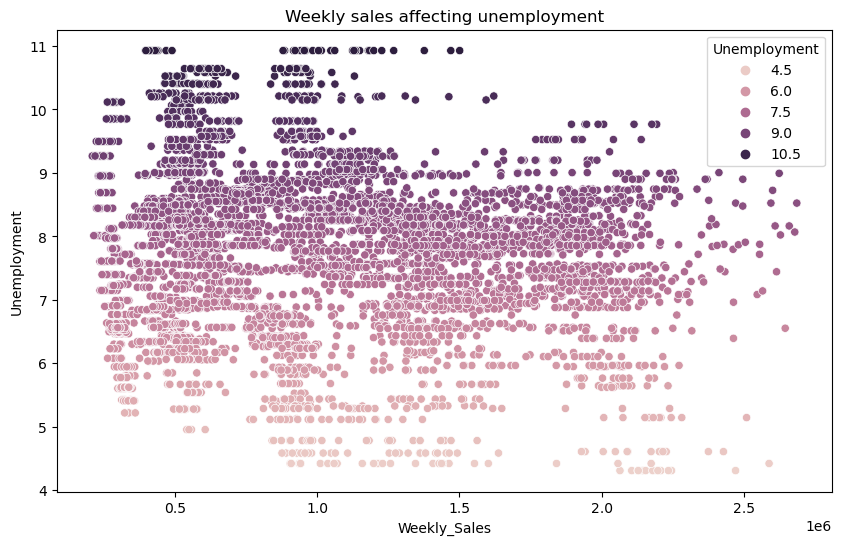

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Weekly_Sales',
                y = 'Unemployment' ,
                data = data,
                hue = 'Unemployment')
plt.title('Weekly sales affecting unemployment')

Text(0.5, 1.0, 'Weekly sales affecting unemployment')

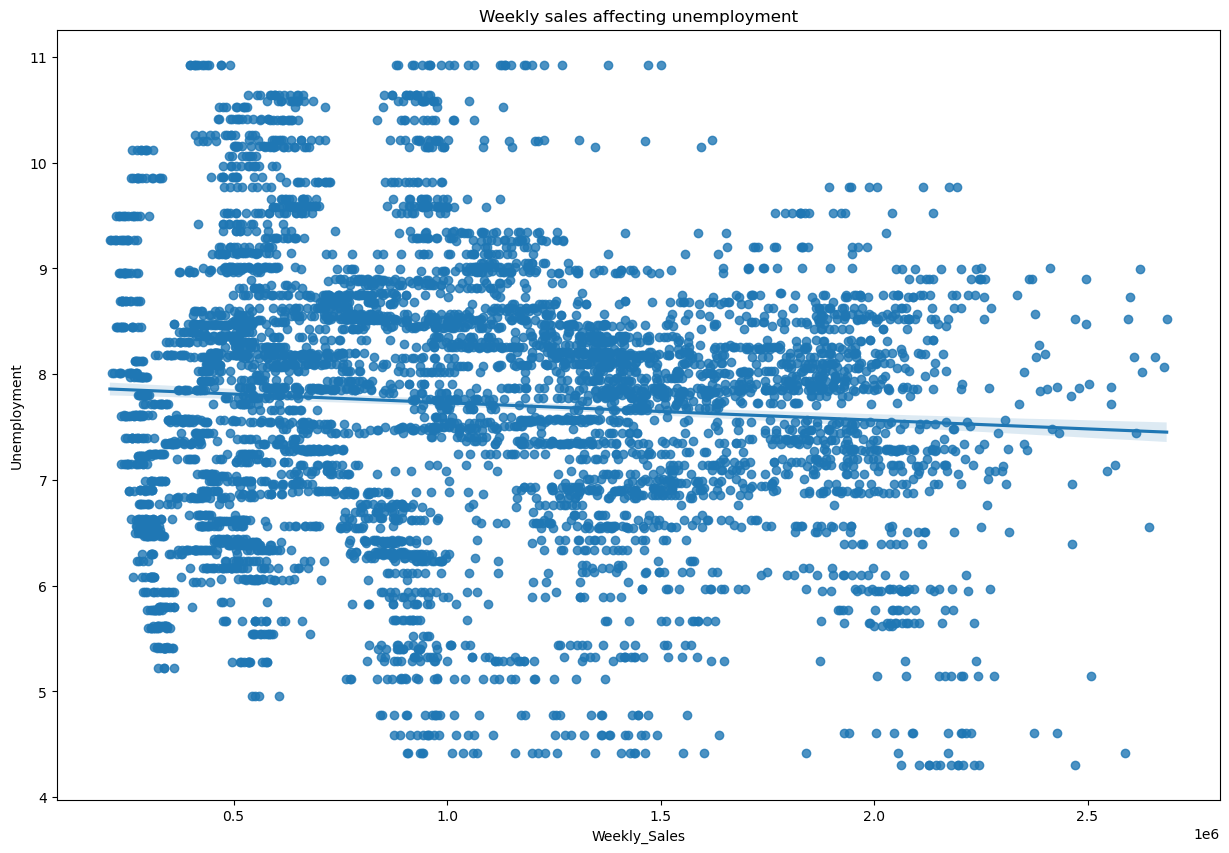

In [27]:
plt.figure(figsize=(15, 10))
sns.regplot(x = 'Weekly_Sales',
                y = 'Unemployment' ,
                data = data,
                )
plt.title('Weekly sales affecting unemployment')

In [28]:
correlation_weeklysales_unemployment = data['Weekly_Sales'].corr(data['Unemployment'])
print("The correlation between the weekly sales and unemployment is",correlation_weeklysales_unemployment)

The correlation between the weekly sales and unemployment is -0.0731068707888924


<font color = "#ff4dff"><h4>This suggests a weak negative linear relationship between weekly sales and unemployment rate.</h4></font>

<font color = "orange"><h2> if yes - which stores are suffering the most?</h2></font>

In [29]:
# Calculate correlation between Weekly_Sales and Unemployment for each store
correlation_df = data.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr()

# Get the store with the highest negative correlation
store_with_highest_negative_corr = correlation_df.xs('Unemployment', level=1)['Weekly_Sales'].idxmin()
min_corr_value = correlation_df.xs('Unemployment', level=1)['Weekly_Sales'].min()

print("Store with the Highest Negative Correlation with Unemployment Rate:", store_with_highest_negative_corr)
print("Correlation Value:", min_corr_value)


Store with the Highest Negative Correlation with Unemployment Rate: 44
Correlation Value: -0.7800764432910212


<font color = "orange"><h2>If the weekly sales show a seasonal trend, when and what could be the reason?</h2></font>


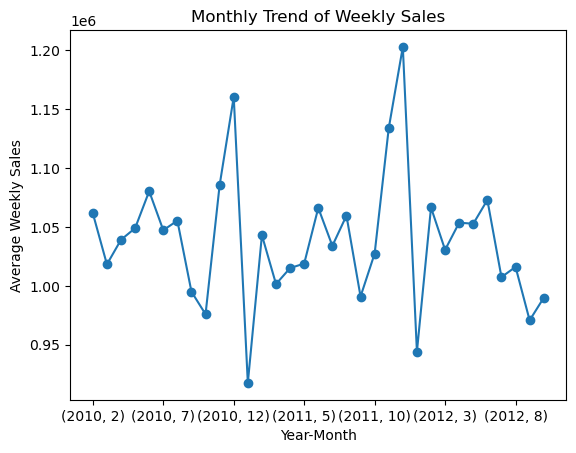

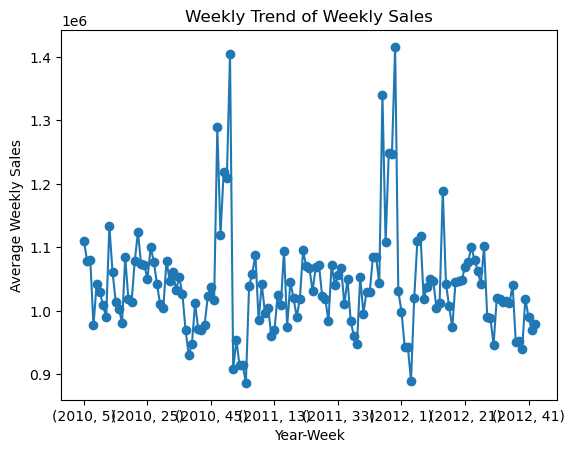

In [30]:
# For monthly trend
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Trend of Weekly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Average Weekly Sales')
plt.show()

# For weekly trend
weekly_sales = data.groupby(['Year', 'Week'])['Weekly_Sales'].mean()
weekly_sales.plot(kind='line', marker='o')
plt.title('Weekly Trend of Weekly Sales')
plt.xlabel('Year-Week')
plt.ylabel('Average Weekly Sales')
plt.show()


<font color = "#ff4dff"><h4>we observe a repeating pattern in the plots, it may indicate a seasonal trend in the weekly sales.</h4></font>

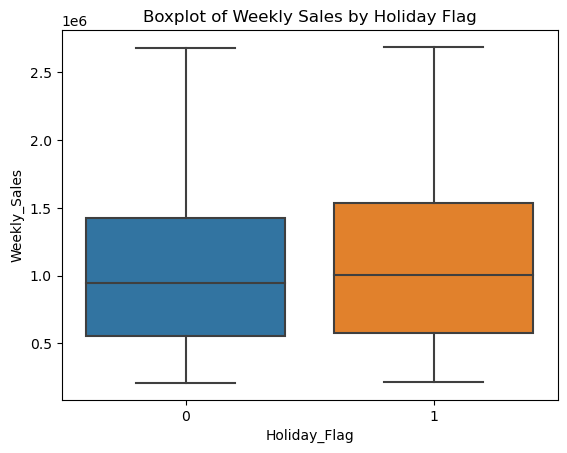

In [31]:
# Assuming 'Weekly_Sales' and 'Holiday_Flag' are columns in your DataFrame
x = data['Holiday_Flag']
y = data['Weekly_Sales']

sns.boxplot(x = x, y = y ,data = data)
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly_Sales')
plt.title('Boxplot of Weekly Sales by Holiday Flag')
plt.show()


<font color = "#ff4dff"><h4>From the above box plot we can say that the weekly sales is high during the Holiday</h4></font>

<font color = "orange"><h2>Does temperature affect the weekly sales in any manner?</h2></font>


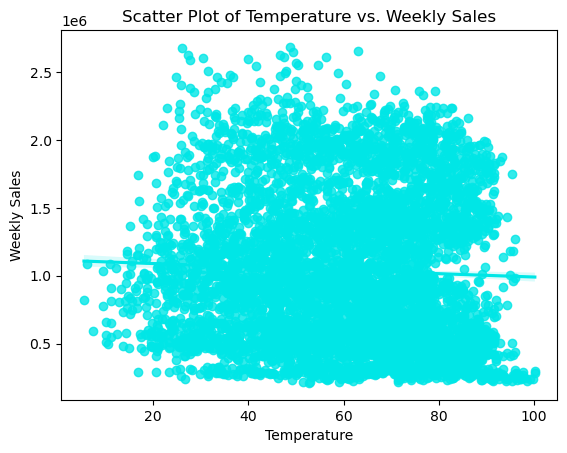

In [32]:
sns.regplot(x = 'Temperature',y='Weekly_Sales',data = data , color = "#00e6e6")
plt.title('Scatter Plot of Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


In [33]:
correlation_temperature_sales = data['Temperature'].corr(data['Weekly_Sales'])
print(f"Correlation between Temperature and Weekly Sales: {correlation_temperature_sales}")

Correlation between Temperature and Weekly Sales: -0.04146056949039012


<font color = "#ff4dff"><h4>This value is close to zero, indicating a very weak correlation between temperature and weekly sales. The negative sign of the correlation coefficient suggests a slight inverse relationship: as temperature increases, weekly sales tend to slightly decrease, and vice versa.</h4></font>

<font color = "orange"><h2>How is fuel price affecting weekly sales of various stores</h2></font>

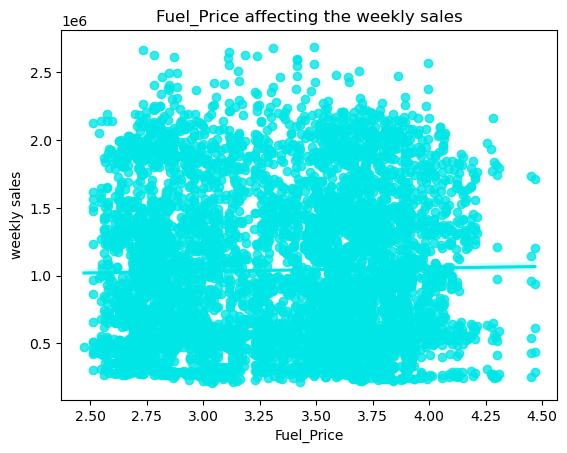

In [34]:
sns.regplot(x = 'Fuel_Price', y = 'Weekly_Sales', data = data,color = "#00e6e6")
plt.xlabel('Fuel_Price')
plt.ylabel('weekly sales')
plt.title("Fuel_Price affecting the weekly sales")
plt.show()

In [35]:
fuel_price_weekly_sales = data['Fuel_Price'].corr(data['Weekly_Sales'])
print("The correlation between Fuel price and weekly sales is : ",fuel_price_weekly_sales)

The correlation between Fuel price and weekly sales is :  0.01966338067818416


<font color = "#ff4dff"><h4>Fuel price and Weekly Sales is very close to zero. This suggests a very weak or negligible linear relationship between the two variables.</h4></font>

<font color = "orange"><h2>How is the Consumer Price index affecting the weekly sales of various stores?</h2></font>


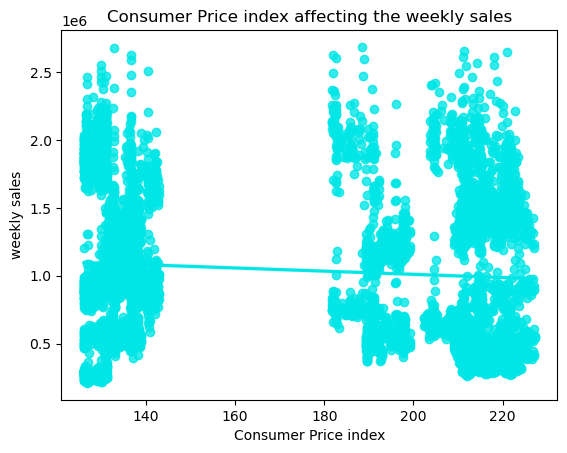

In [36]:
sns.regplot(x = 'CPI', y = 'Weekly_Sales', data = data , color = "#00e6e6")
plt.xlabel('Consumer Price index')
plt.ylabel('weekly sales')
plt.title("Consumer Price index affecting the weekly sales")
plt.show()

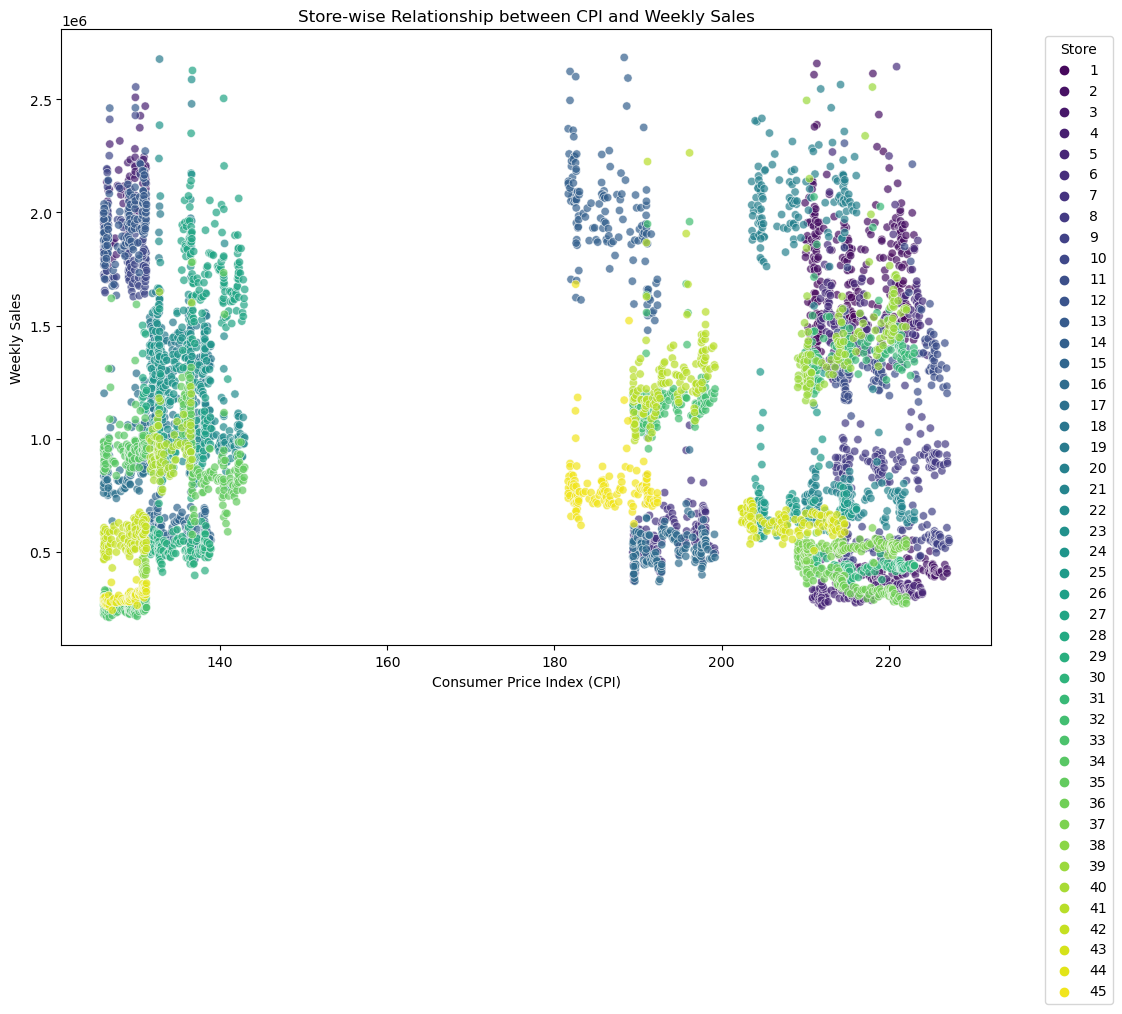

In [37]:
# Scatter plot for each store
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CPI', y='Weekly_Sales', hue='Store', data=data, palette='viridis', alpha=0.7)
plt.title('Store-wise Relationship between CPI and Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


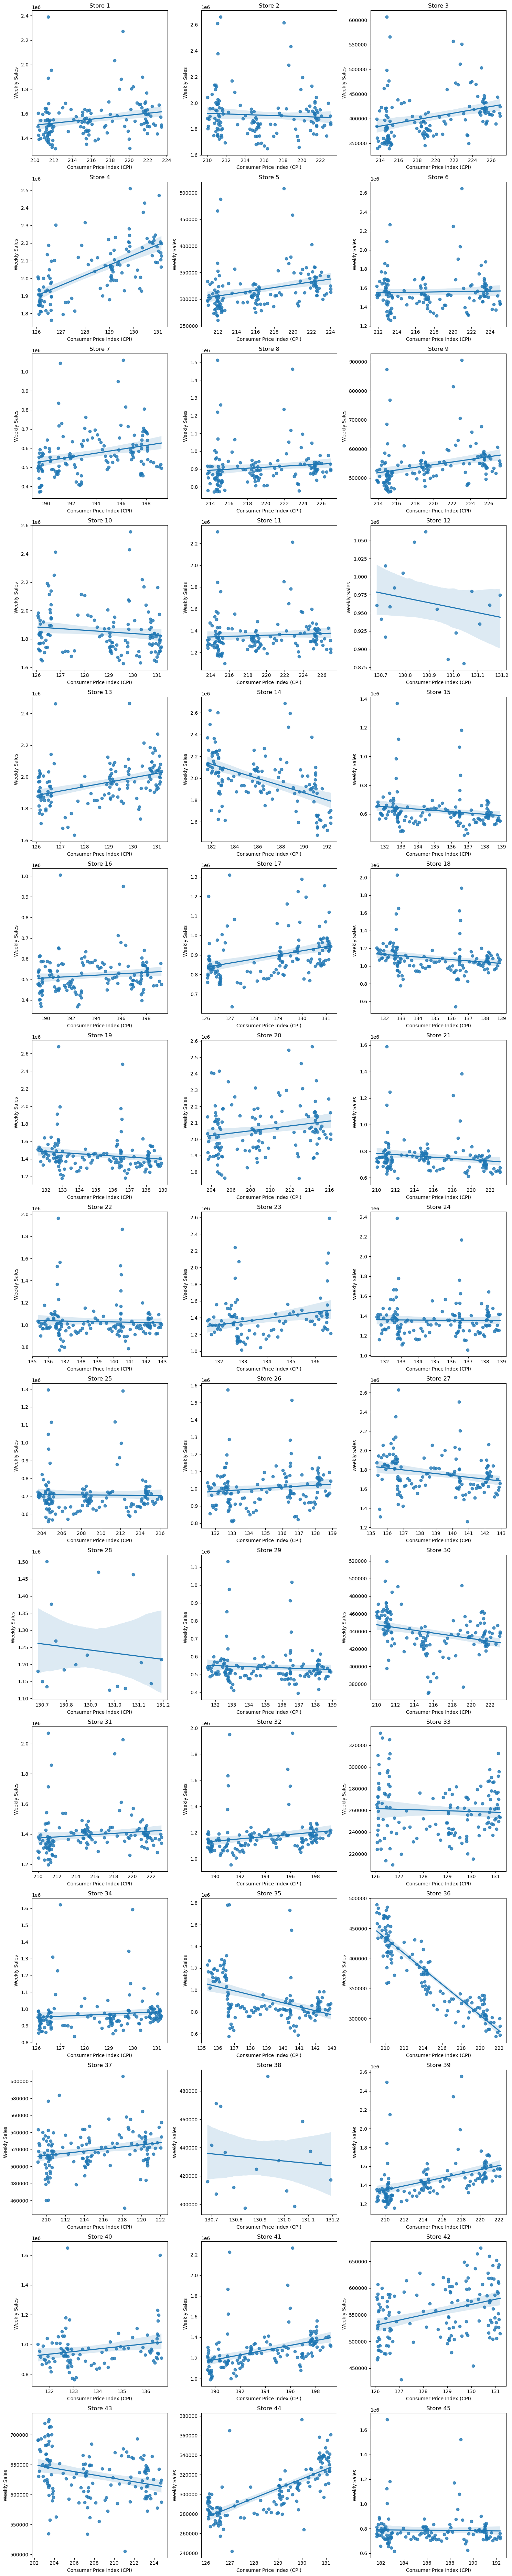

In [38]:
# Create subplots for each store
stores = data['Store'].unique()
num_stores = len(stores)
cols = 3  # Number of columns in the subplot grid
rows = (num_stores + 1) // cols  # Number of rows in the subplot grid

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i, store in enumerate(stores):
    row_idx = i // cols
    col_idx = i % cols

    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    # Filter data for the current store
    store_data = data[data['Store'] == store]

    # Create a regression plot for CPI vs Weekly Sales
    sns.regplot(x='CPI', y='Weekly_Sales', data=store_data, ax=ax)

    ax.set_title(f'Store {store}')
    ax.set_xlabel('Consumer Price Index (CPI)')
    ax.set_ylabel('Weekly Sales')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [39]:
consumer_price_indexing_weekly_sales = data['CPI'].corr(data['Weekly_Sales'])
print("The correlation between Consumer Price index and weekly sales is : ",consumer_price_indexing_weekly_sales)

The correlation between Consumer Price index and weekly sales is :  -0.08290038647485086


<font color = "#ff4dff"><h4>This value is close to zero, indicating a very weak correlation between Consumer Price index and weekly sales. The negative sign of the correlation coefficient suggests a slight inverse relationship: as Consumer Price index increases, weekly sales tend to slightly decrease, and vice versa.</h4></font>

<font color = "orange"><h2>Top performing stores according to the historical data.</h2></font>


In [40]:
# Calculate total weekly sales for each store
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()

# Sort stores based on total weekly sales in descending order
top_stores = total_sales_by_store.sort_values(ascending=False)

# Display the top-performing stores
print("Top Performing Stores:")
print(top_stores)

Top Performing Stores:
Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
27    2.480387e+08
4     2.446487e+08
1     2.224028e+08
6     2.210286e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
24    1.940160e+08
11    1.939628e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
26    1.434164e+08
34    1.382498e+08
23    1.372484e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
40    9.669790e+07
43    9.056544e+07
15    8.913368e+07
7     8.104025e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
28    2.110677e+07
12    1.638671e+07
38    7.347379e+06
Name: Weekly_Sales, dtype: float64


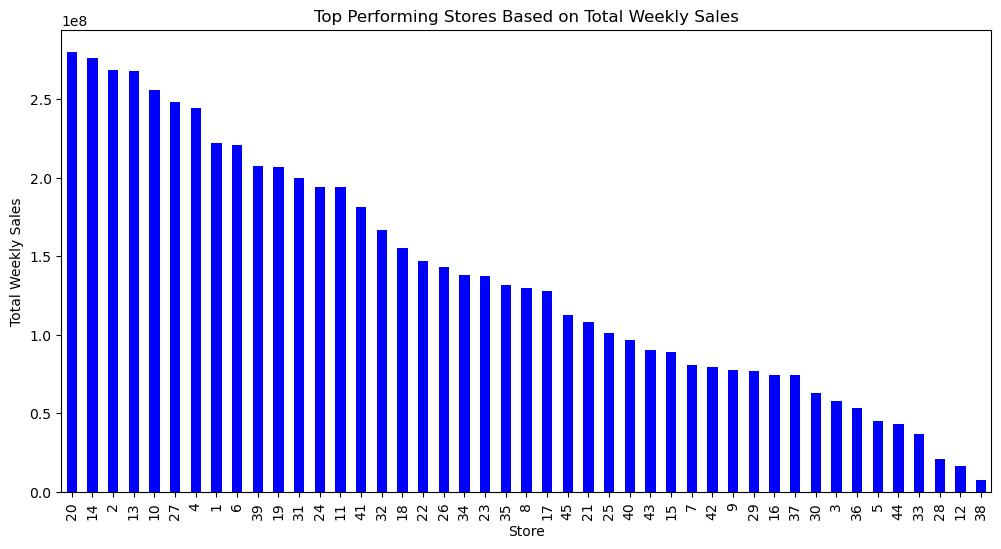

In [41]:
# Plot the total weekly sales for the top-performing stores
plt.figure(figsize=(12, 6))
top_stores.plot(kind='bar', color='blue')
plt.title('Top Performing Stores Based on Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

<font color = "orange"><h2>The worst performing store, and how significant is the difference between the highest and lowest performing stores.</h2></font>

In [42]:
worst_store = total_sales_by_store.sort_values(ascending = True)
print("Worst Performing Store :")
print(worst_store)

Worst Performing Store :
Store
38    7.347379e+06
12    1.638671e+07
28    2.110677e+07
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.104025e+07
15    8.913368e+07
43    9.056544e+07
40    9.669790e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
23    1.372484e+08
34    1.382498e+08
26    1.434164e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
11    1.939628e+08
24    1.940160e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
6     2.210286e+08
1     2.224028e+08
4     2.446487e+08
27    2.480387e+08
10    2.556789e+08
13    2.682025e+08
2     2.687221e+08
14    2.761276e+08
20    2.800237e+08
Name: Weekly_Sales, dtype: float64


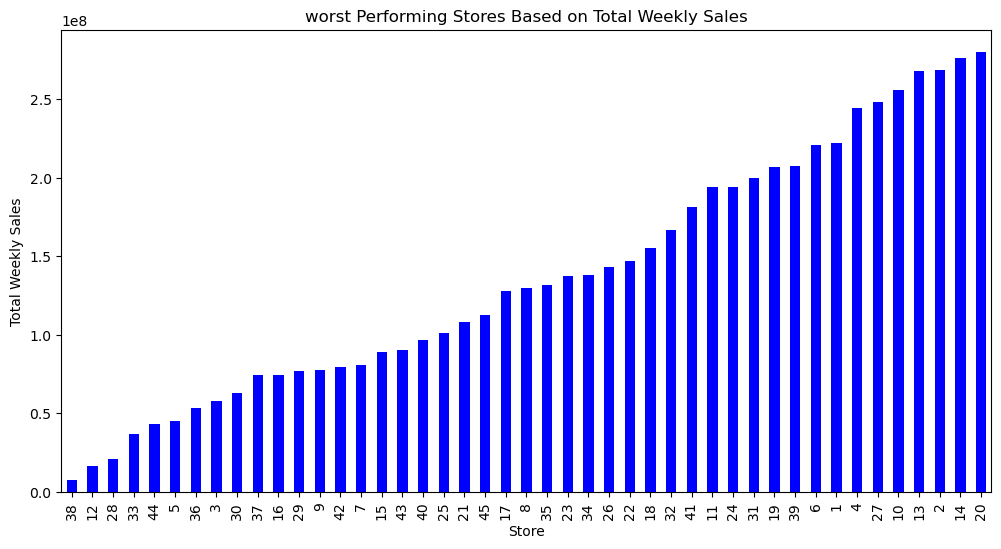

In [43]:
# Plot the total weekly sales for the worst-performing stores
plt.figure(figsize=(12, 6))
worst_store.plot(kind='bar', color='blue')
plt.title('worst Performing Stores Based on Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

In [44]:
# Calculate total weekly sales for each store
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()

# Find the worst-performing store
worst_store = total_sales_by_store.idxmin()
worst_store_sales = total_sales_by_store.min()

# Find the best-performing store
best_store = total_sales_by_store.idxmax()
best_store_sales = total_sales_by_store.max()

# Calculate the difference between the highest and lowest performing stores
sales_difference = best_store_sales - worst_store_sales

# Display the worst and best performing stores
print(f"Worst Performing Store: {worst_store} with total sales: {worst_store_sales}")
print(f"Best Performing Store: {best_store} with total sales: {best_store_sales}")
print(f"Difference in Total Sales: {sales_difference}")




Worst Performing Store: 38 with total sales: 7347378.89
Best Performing Store: 20 with total sales: 280023734.81
Difference in Total Sales: 272676355.92


In [45]:
# Find the worst performing store
worst_store = total_sales_by_store.idxmin()
worst_store_sales = total_sales_by_store.min()

# Calculate the difference between the highest and lowest performing stores
difference = total_sales_by_store.max() - worst_store_sales

# Display the worst performing store and the difference
print("\nWorst Performing Store:")
print(f"Store {worst_store} with total weekly sales: {worst_store_sales:,.2f}")

print("\nDifference Analysis:")
print(f"Difference between highest and lowest performing stores: {difference:,.2f}")



Worst Performing Store:
Store 38 with total weekly sales: 7,347,378.89

Difference Analysis:
Difference between highest and lowest performing stores: 272,676,355.92


In [46]:
data.drop(columns= ['Year','Month','Week'],inplace = True)

In [47]:
data.head(1)

Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                   
2010-02-05     1     1643690.9            0        42.31       2.572   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106

<font color = "orange"><h2>Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.</h2></font>

<font color = "#ff6600"><h2>Forcast of the sales for each store</h2></font>

In [ ]:
data['Store'] = data['Store'].astype('int')

# Group by Date and calculate the mean
sample_data = data.groupby(['Date', 'Store'])['Weekly_Sales'].mean().reset_index()

In [49]:
sample_data.head()

Date  Store  Weekly_Sales
0 2010-02-05      1    1643690.90
1 2010-02-05      2    2136989.46
2 2010-02-05      3     461622.22
3 2010-02-05      4    2135143.87
4 2010-02-05      5     317173.10

In [50]:
sample_data = sample_data.set_index('Date')
sample_data.head()

Store  Weekly_Sales
Date                           
2010-02-05      1    1643690.90
2010-02-05      2    2136989.46
2010-02-05      3     461622.22
2010-02-05      4    2135143.87
2010-02-05      5     317173.10

<Axes: xlabel='Date'>

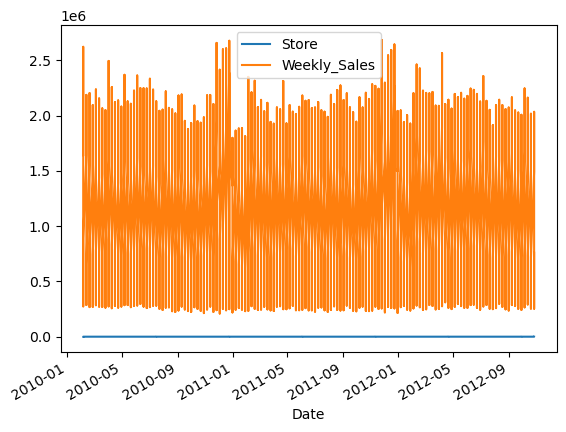

In [51]:
sample_data.plot()

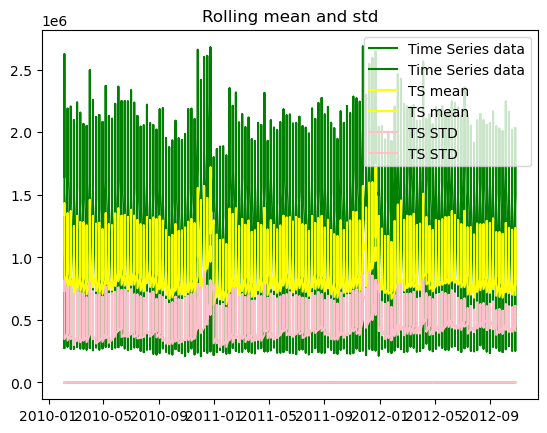

In [52]:
mean11_log = sample_data.rolling(window=12).mean()
std11_log = sample_data.rolling(window=12).std()

plt.plot(sample_data, color = 'green', label = 'Time Series data')
plt.plot(mean11_log, color = 'yellow', label = 'TS mean')
plt.plot(std11_log, color = 'pink', label = 'TS STD')
plt.title('Rolling mean and std')
plt.legend(loc='best')
plt.show()

<font color = "#ff6600"><h2>Performing ADFULLER test to check for stationarity</h2></font>

In [53]:
result_stationary11 = adfuller(sample_data['Weekly_Sales'])
result_stationary11

(-8.711917942840246,
 3.5720718104797074e-14,
 34,
 5884,
 {'1%': -3.431461855050227,
  '5%': -2.8620313359508884,
  '10%': -2.5670315359273164},
 168909.4924317351)

In [54]:
if(result_stationary11[1]<0.05):
    print('TS_data is stationary')
else:
    print('TS_data is not stationary')

TS_data is stationary


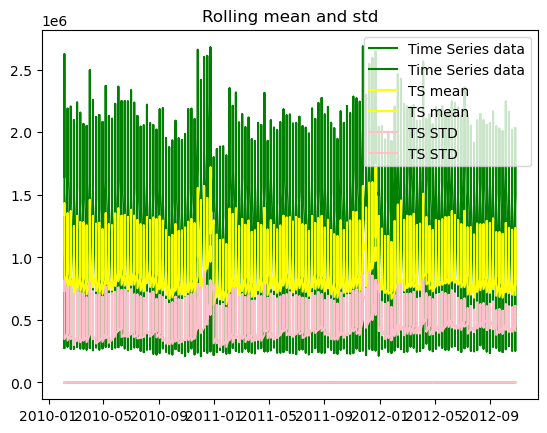

In [55]:
mean11_log = sample_data.rolling(window=12).mean()
std11_log = sample_data.rolling(window=12).std()

plt.plot(sample_data, color = 'green', label = 'Time Series data')
plt.plot(mean11_log, color = 'yellow', label = 'TS mean')
plt.plot(std11_log, color = 'pink', label = 'TS STD')
plt.title('Rolling mean and std')
plt.legend(loc='best')
plt.show()

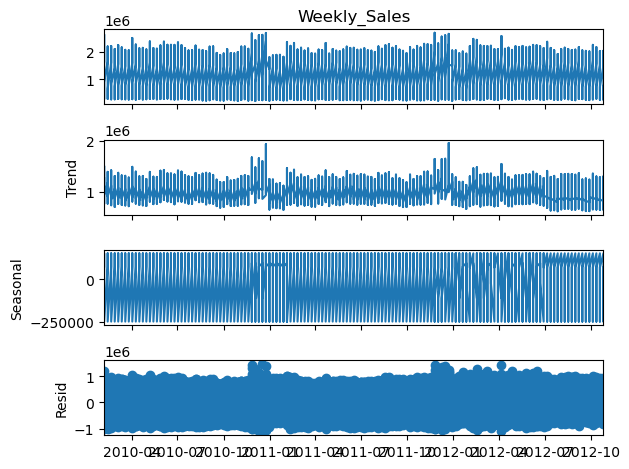

In [56]:
decompose_result = seasonal_decompose(sample_data['Weekly_Sales'].dropna(), period=7)
decompose_result.plot();

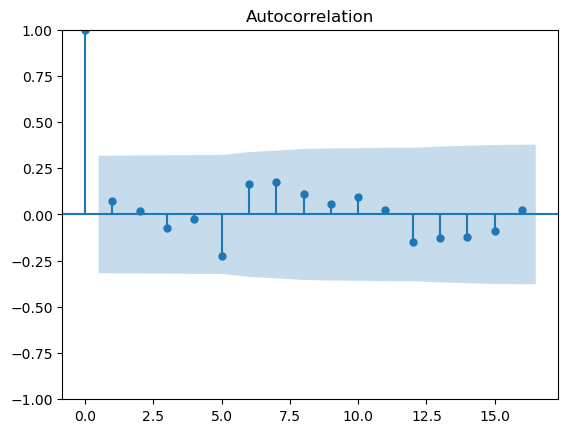

In [57]:
acf_plot_data = acf(sample_data['Weekly_Sales'])
plot_acf(acf_plot_data);

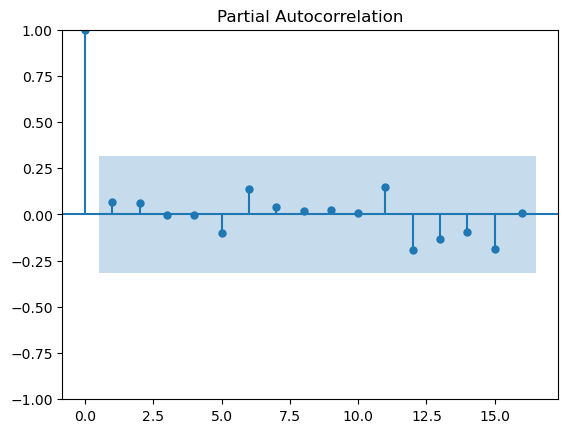

In [58]:
pacf_plot_data = pacf(sample_data['Weekly_Sales'])
plot_pacf(pacf_plot_data);

<font color = "#ff6600"><h2>Applying ARIMA Model</h2></font>

In [59]:
train = sample_data.iloc[:120]['Weekly_Sales']
test = sample_data.iloc[120:]['Weekly_Sales']

In [60]:
arima_model = ARIMA(train,order = (8,0,2))
arima_model_fit = arima_model.fit()

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

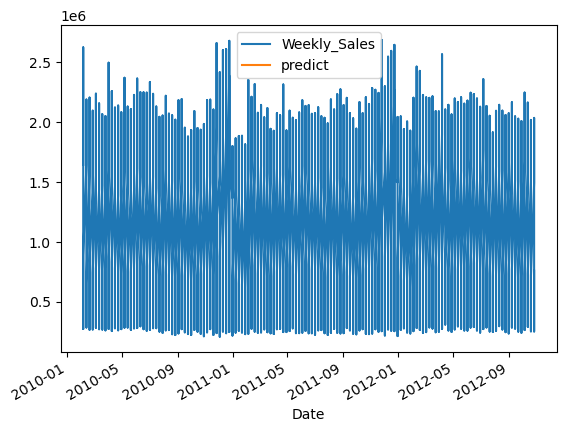

In [61]:
sample_data['predict'] = arima_model_fit.predict(start = len(train),end = len(train)+len(test)-1,dymanic = True)
sample_data[['Weekly_Sales','predict']].plot()

In [62]:
#Itertools


## How to find the ideal values for p,d,q:

import itertools

p = range(0,15)
q = range(0,15)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values
#results

450


F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

RMSE
(13, 0, 13)  5.478626e+05
(9, 0, 12)   5.490301e+05
(13, 1, 12)  5.493645e+05
(12, 1, 12)  5.494168e+05
(14, 1, 13)  5.497192e+05
...                   ...
(8, 1, 11)   7.365997e+05
(8, 1, 12)   7.623039e+05
(7, 1, 11)   7.696317e+05
(7, 1, 12)   8.536145e+05
(9, 1, 9)    5.706523e+08

[450 rows x 1 columns]

In [63]:
arima_model = ARIMA(train,order = (13,1,12))
arima_model_fit = arima_model.fit()

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

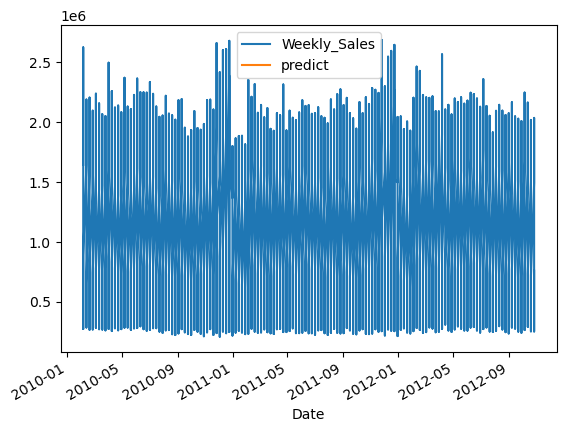

In [64]:
sample_data['predict'] = arima_model_fit.predict(start = len(train),end = len(train)+len(test)-1,dymanic = True)
sample_data[['Weekly_Sales','predict']].plot()

<font color = "#ff6600"><h2>Applying SARIMAX Model</h2></font>

In [65]:
sarimax_model = SARIMAX(train, order = (13,1,12), seasonal_order = (0,1,0,12))
sarimax_model = sarimax_model.fit()

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

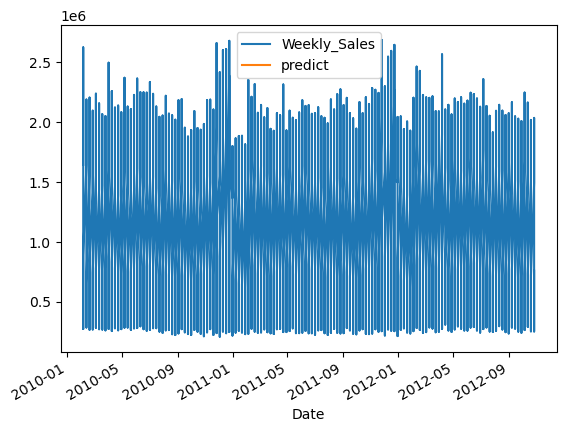

In [66]:
sample_data['predict'] = sarimax_model.predict(start = len(train),end = len(train)+len(test)-1,dymanic = True)
sample_data[['Weekly_Sales','predict']].plot()

In [67]:
sample_data.head()

Store  Weekly_Sales  predict
Date                                    
2010-02-05      1    1643690.90      NaN
2010-02-05      2    2136989.46      NaN
2010-02-05      3     461622.22      NaN
2010-02-05      4    2135143.87      NaN
2010-02-05      5     317173.10      NaN

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

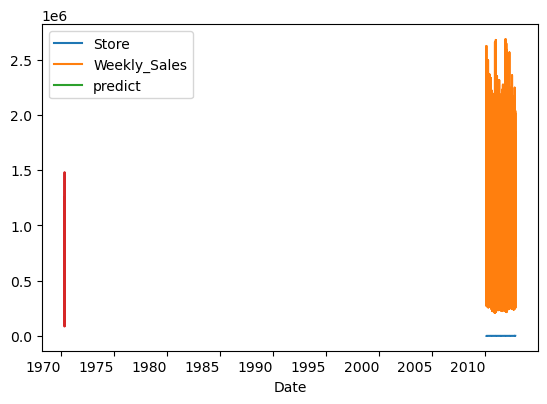

In [68]:
forecast = sarimax_model.forecast(steps = 12)
sample_data.plot()
forecast.plot()

<font color = "#ff6600"><h2>Model Building and predictions for weekly sales</h2></font>

In [69]:
TS_data = data.groupby(['Date'])[['Weekly_Sales']].mean()
TS_data

Weekly_Sales
Date                    
2010-02-05  1.109996e+06
2010-02-12  1.078991e+06
2010-02-19  1.080072e+06
2010-02-26  9.772276e+05
2010-03-05  1.043185e+06
...                  ...
2012-09-28  9.397297e+05
2012-10-05  1.019597e+06
2012-10-12  9.904771e+05
2012-10-19  9.700909e+05
2012-10-26  9.791858e+05

[143 rows x 1 columns]

<Axes: xlabel='Date'>

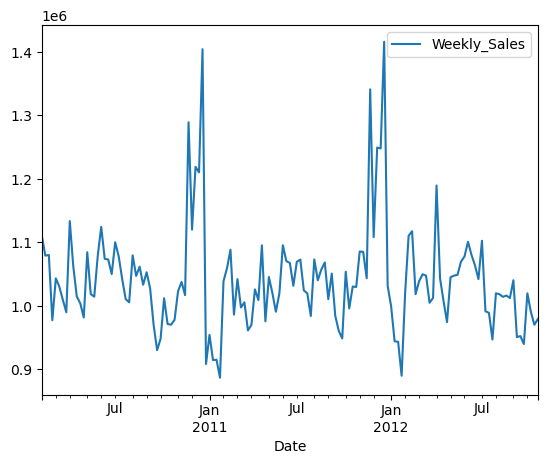

In [70]:
TS_data.plot()

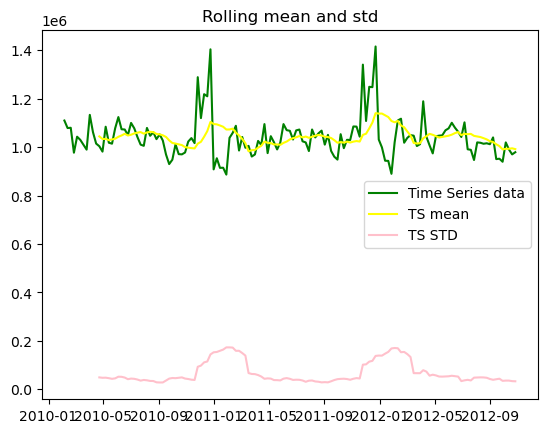

In [71]:
mean1_log = TS_data.rolling(window=12).mean()
std1_log = TS_data.rolling(window=12).std()

plt.plot(TS_data, color = 'green', label = 'Time Series data')
plt.plot(mean1_log, color = 'yellow', label = 'TS mean')
plt.plot(std1_log, color = 'pink', label = 'TS STD')
plt.title('Rolling mean and std')
plt.legend(loc='best')
plt.show()

<font color = "#ff6600"><h2>Performing ADFULLER test to check stationarity</h2></font>

In [72]:
result_stationary1 = adfuller(TS_data['Weekly_Sales'])
result_stationary1

(-3.92803564860763,
 0.0018379392986627536,
 6,
 136,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623},
 3222.8787442626376)

In [73]:
if(result_stationary1[1]<0.05):
    print('TS_data is stationary')
else:
    print('TS_data is not stationary')

TS_data is stationary


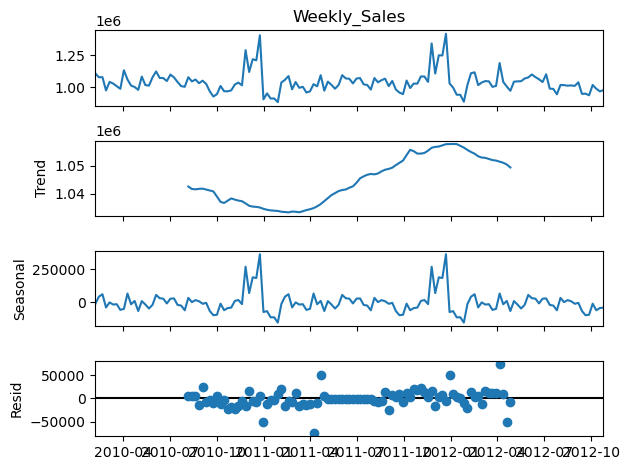

In [74]:
decompose_result = seasonal_decompose(TS_data['Weekly_Sales'].dropna())
decompose_result.plot();

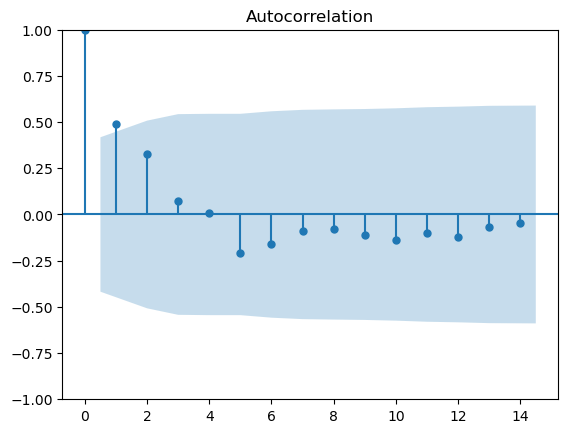

In [75]:
acf_plot_data = acf(TS_data)
plot_acf(acf_plot_data);

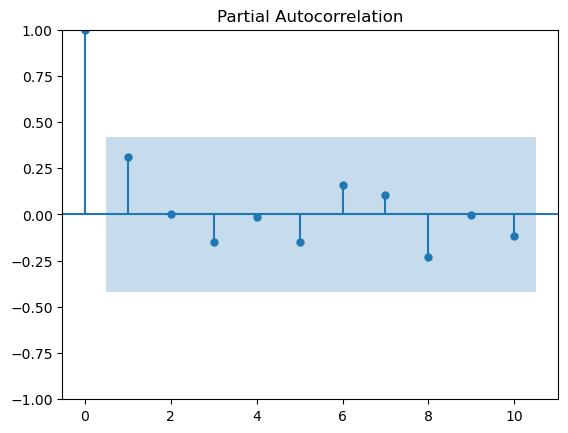

In [76]:
pacf_plot_data = pacf(TS_data)
plot_pacf(pacf_plot_data, lags=10);

In [77]:
TS_data.shape

(143, 1)

In [78]:
train = TS_data.iloc[:120]['Weekly_Sales']
test = TS_data.iloc[120:]['Weekly_Sales']

<font color = "#ff6600"><h2>Applying ARIMA Model</h2></font>

In [79]:
arima_model = ARIMA(train,order = (4,0,3))
arima_model_fit = arima_model.fit()

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

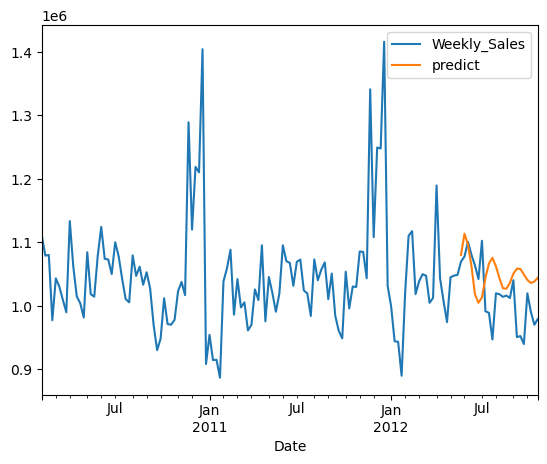

In [80]:
TS_data['predict'] = arima_model_fit.predict(start = len(train),end = len(train)+len(test)-1,dymanic = True)
TS_data[['Weekly_Sales','predict']].plot()

In [81]:
#Itertools


## How to find the ideal values for p,d,q:

import itertools

p = range(0,15)
q = range(0,15)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values
#results

450


F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site

RMSE
(0, 1, 14)   39756.345604
(3, 1, 14)   41155.310208
(0, 1, 5)    46199.253961
(9, 1, 3)    47036.712011
(10, 0, 13)  50747.795185
...                   ...
(9, 1, 11)   79962.083191
(12, 1, 13)  82092.362136
(13, 1, 12)  82683.871379
(13, 0, 13)  87474.795739
(14, 1, 14)  91160.610165

[450 rows x 1 columns]

In [82]:
arima_model2 = ARIMA(train,order = (0,1,14))
arima_model2_fit = arima_model2.fit()

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

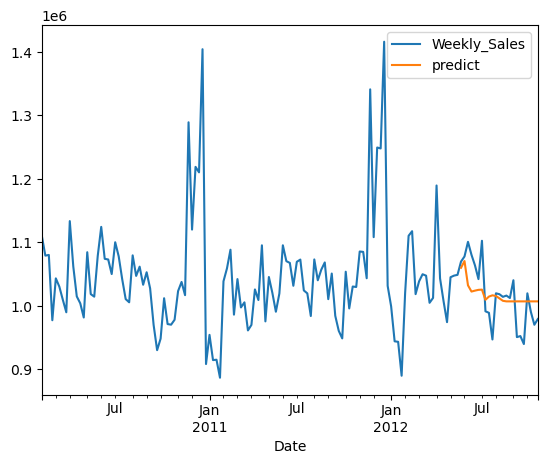

In [83]:
TS_data['predict'] = arima_model2_fit.predict(start = len(train),end = len(train)+len(test)-1,dymanic = True)
TS_data[['Weekly_Sales','predict']].plot()

<font color = "#ff6600"><h2>Applying SARIMAX Model</h2></font>

In [89]:
sarimax_model2 = SARIMAX(train, order = (0,1,14), seasonal_order = (0,1,0,12))
sarimax_model2 = sarimax_model2.fit()

F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
F:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

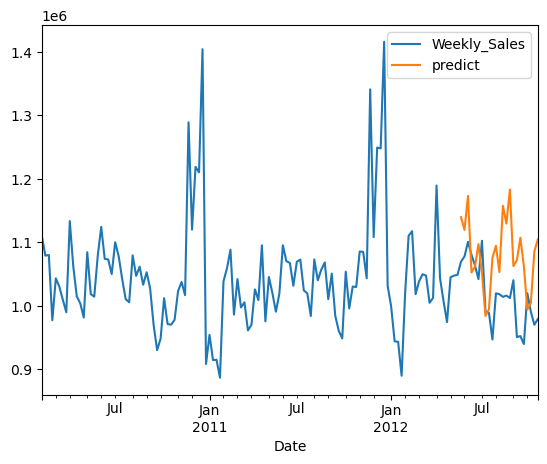

In [90]:
TS_data['predict'] = sarimax_model2.predict(start = len(train),end = len(train)+len(test)-1,dymanic = True)
TS_data[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

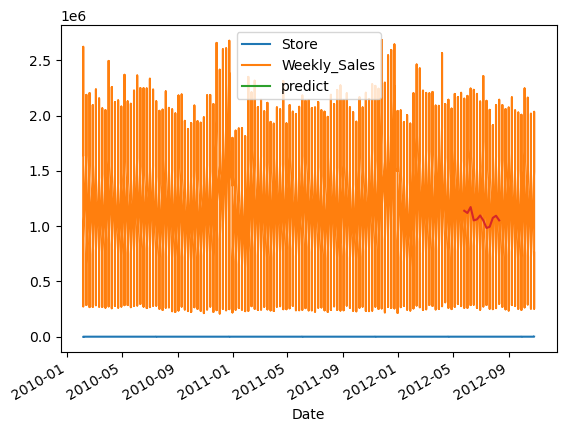

In [91]:
forecast2 = sarimax_model2.forecast(steps = 12)
sample_data.plot()
forecast2.plot()

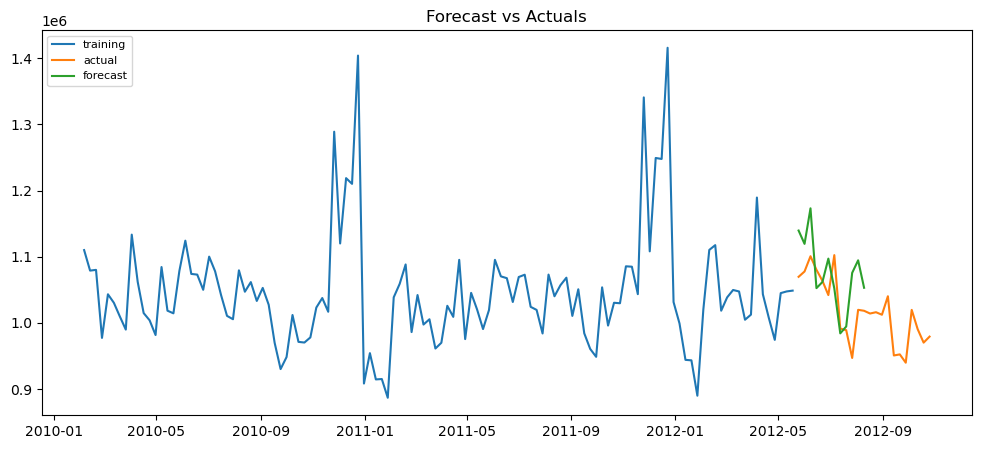

In [92]:
fc= sarimax_model2.forecast(steps=12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()